In [14]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


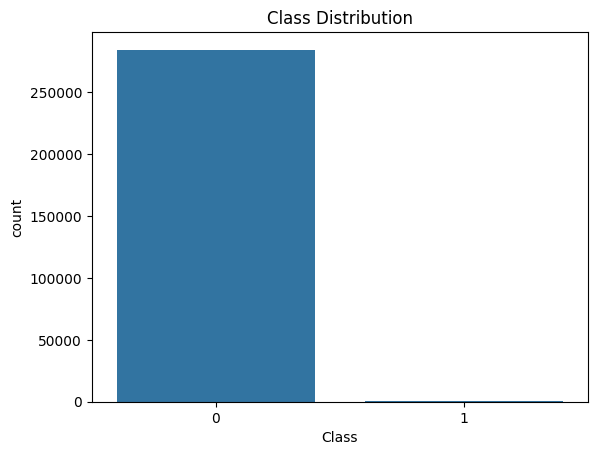

Fraud cases: 0.1727%


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

# Percentage of fraud cases
fraud_percentage = df['Class'].mean() * 100
print(f"Fraud cases: {fraud_percentage:.4f}%")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

# Features and labels
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# For faster training, let's use a smaller sample first
# You can increase this later once you're satisfied with the approach
sample_size = 50000  # Use 50k samples instead of full 284k
if len(df) > sample_size:
    sample_indices = np.random.choice(len(df), sample_size, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    print(f"Using sample of {sample_size} records for faster training")
else:
    X_sample = X
    y_sample = y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Check class distribution in training set
fraud_count = y_train.sum()
normal_count = len(y_train) - fraud_count
print(f"Training set - Normal: {normal_count}, Fraud: {fraud_count}")

# Optimized parameters for best accuracy with 50k samples
start_time = time.time()
model = RandomForestClassifier(
    n_estimators=200,           # Increased for better accuracy
    max_depth=None,             # Allow deeper trees for better learning
    min_samples_split=2,        # Default - allows more splits
    min_samples_leaf=1,         # Default - allows finer granularity
    max_features='sqrt',        # Good balance for feature selection
    bootstrap=True,             # Enable bootstrapping
    class_weight='balanced',    # Handle class imbalance automatically
    n_jobs=-1,                  # Use all CPU cores
    random_state=42,
    oob_score=True             # Out-of-bag score for model validation
)
model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")
print(f"Out-of-bag score: {model.oob_score_:.4f}")

# Predictions
y_pred = model.predict(X_test)

Using sample of 50000 records for faster training
Training set size: 40000
Test set size: 10000
Training set - Normal: 39931, Fraud: 69
Training completed in 2.39 seconds
Out-of-bag score: 0.9993
Training completed in 2.39 seconds
Out-of-bag score: 0.9993


In [17]:
# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy and other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print(f"\nTraining completed in {training_time:.2f} seconds using {sample_size} samples")
print("\nTo use the full dataset, change sample_size to len(df) in the previous cell")
print("Or gradually increase sample_size (e.g., 100000, 150000) to find the right balance")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9978
           1       1.00      0.64      0.78        22

    accuracy                           1.00     10000
   macro avg       1.00      0.82      0.89     10000
weighted avg       1.00      1.00      1.00     10000


Confusion Matrix:
[[9978    0]
 [   8   14]]

Model Performance:
Accuracy: 0.9992
Precision: 1.0000
Recall: 0.6364
F1-Score: 0.7778

Training completed in 2.39 seconds using 50000 samples

To use the full dataset, change sample_size to len(df) in the previous cell
Or gradually increase sample_size (e.g., 100000, 150000) to find the right balance


Top 10 Most Important Features:
   feature  importance
13     V14    0.156651
9      V10    0.144267
3       V4    0.122376
2       V3    0.098997
10     V11    0.093981
11     V12    0.075325
16     V17    0.052153
6       V7    0.045887
15     V16    0.029476
1       V2    0.024631


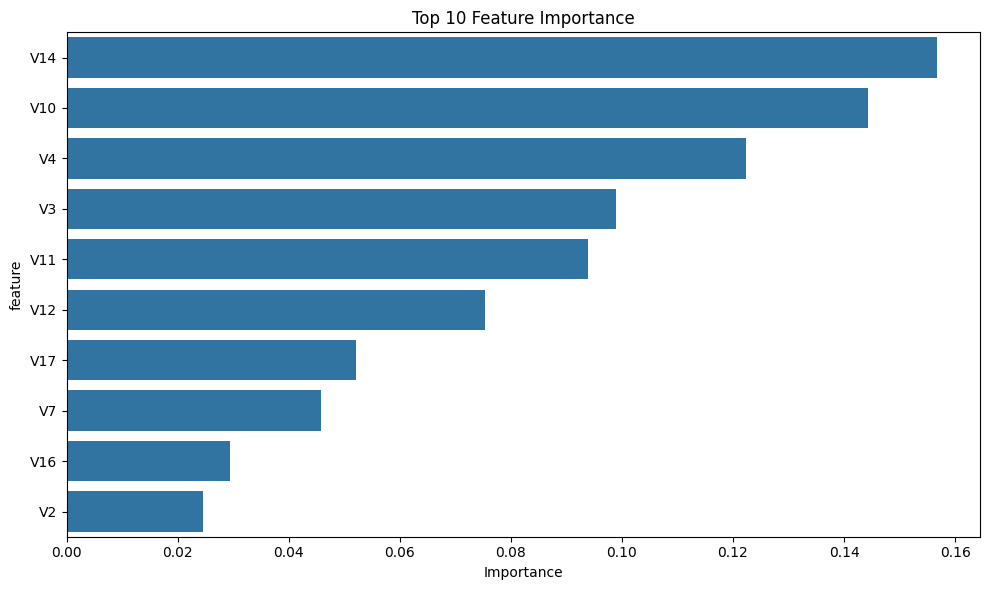


Advanced Metrics:
ROC-AUC Score: 0.9285
PR-AUC Score: 0.7989


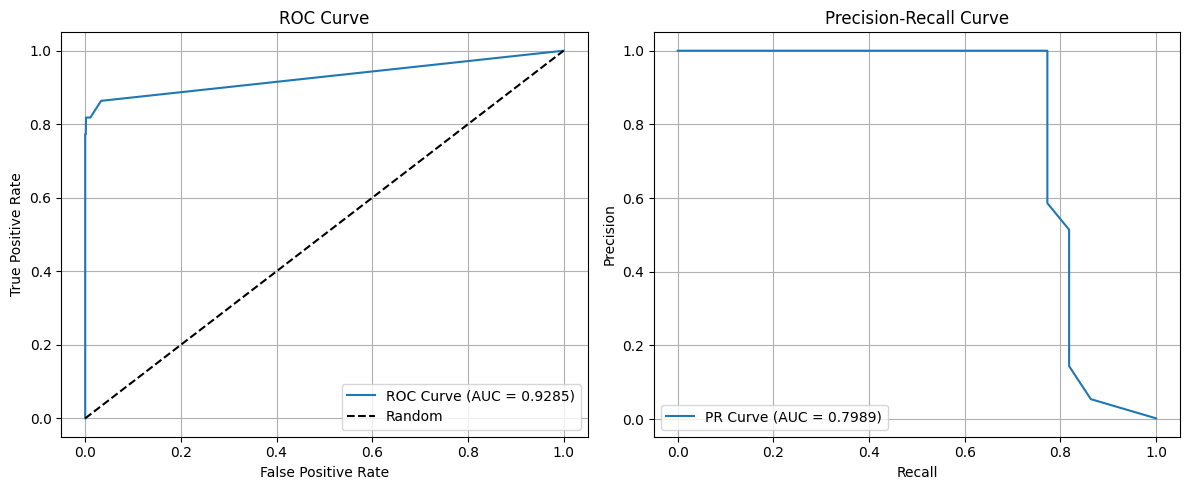

In [18]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Advanced evaluation metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

# Probability predictions for better metrics
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate advanced metrics
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print(f"\nAdvanced Metrics:")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"PR-AUC Score: {pr_auc:.4f}")

# Plot ROC and Precision-Recall curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
ax1.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
ax1.plot([0, 1], [0, 1], 'k--', label='Random')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()
ax1.grid(True)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ax2.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# Comprehensive Data Analysis
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Fraud cases: {df['Class'].sum()} ({df['Class'].mean()*100:.4f}%)")
print(f"Normal cases: {(df['Class'] == 0).sum()} ({(df['Class'] == 0).mean()*100:.4f}%)")

# Missing values check
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(missing_values[missing_values > 0])

# Data types
print("\n=== DATA TYPES ===")
print(df.dtypes.value_counts())

# Statistical summary for fraud vs normal transactions
print("\n=== STATISTICAL COMPARISON: FRAUD vs NORMAL ===")
fraud_data = df[df['Class'] == 1]
normal_data = df[df['Class'] == 0]

print(f"Average transaction amount:")
print(f"  Fraud: ${fraud_data['Amount'].mean():.2f}")
print(f"  Normal: ${normal_data['Amount'].mean():.2f}")

print(f"\nMedian transaction amount:")
print(f"  Fraud: ${fraud_data['Amount'].median():.2f}")
print(f"  Normal: ${normal_data['Amount'].median():.2f}")

print(f"\nTransaction amount standard deviation:")
print(f"  Fraud: ${fraud_data['Amount'].std():.2f}")
print(f"  Normal: ${normal_data['Amount'].std():.2f}")

# Time analysis
print(f"\nTime range:")
print(f"  Start: {df['Time'].min()} seconds")
print(f"  End: {df['Time'].max()} seconds")
print(f"  Duration: {(df['Time'].max() - df['Time'].min()) / 3600:.2f} hours")

=== DATASET OVERVIEW ===
Dataset shape: (284807, 31)
Memory usage: 67.36 MB
Fraud cases: 492 (0.1727%)
Normal cases: 284315 (99.8273%)

=== MISSING VALUES ===
No missing values found!

=== DATA TYPES ===
float64    30
int64       1
Name: count, dtype: int64

=== STATISTICAL COMPARISON: FRAUD vs NORMAL ===
Average transaction amount:
  Fraud: $122.21
  Normal: $88.29

Median transaction amount:
  Fraud: $9.25
  Normal: $22.00

Transaction amount standard deviation:
  Fraud: $256.68
  Normal: $250.11

Time range:
  Start: 0.0 seconds
  End: 172792.0 seconds
  Duration: 48.00 hours


=== CORRELATION ANALYSIS ===


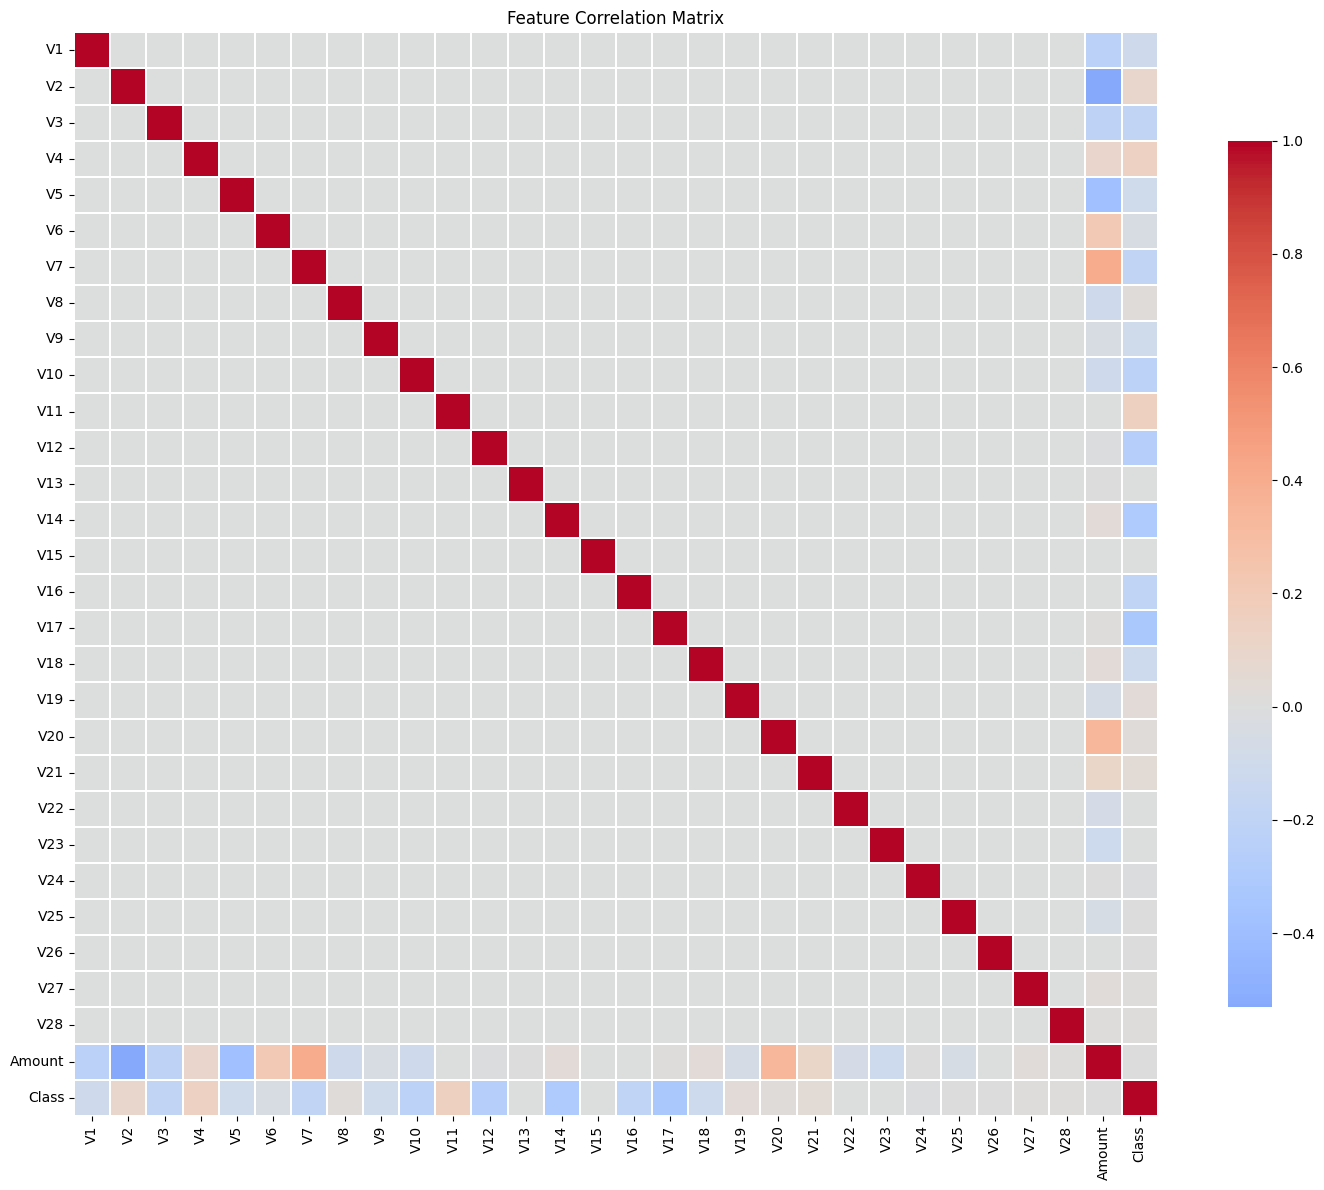


Features most correlated with fraud:
Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64

=== MULTICOLLINEARITY CHECK ===
No highly correlated feature pairs found.


In [20]:
# Correlation Analysis
print("=== CORRELATION ANALYSIS ===")
plt.figure(figsize=(15, 12))

# Calculate correlation matrix
corr_matrix = df.drop(['Time'], axis=1).corr()

# Create heatmap
sns.heatmap(corr_matrix, 
           cmap='coolwarm', 
           center=0,
           square=True,
           linewidths=0.1,
           cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Features most correlated with fraud
fraud_corr = corr_matrix['Class'].abs().sort_values(ascending=False)
print("\nFeatures most correlated with fraud:")
print(fraud_corr.head(10))

# Check for highly correlated features (multicollinearity)
print("\n=== MULTICOLLINEARITY CHECK ===")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Highly correlated feature pairs (|correlation| > 0.8):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} - {feat2}: {corr:.3f}")
else:
    print("No highly correlated feature pairs found.")

=== FEATURE DISTRIBUTION ANALYSIS ===


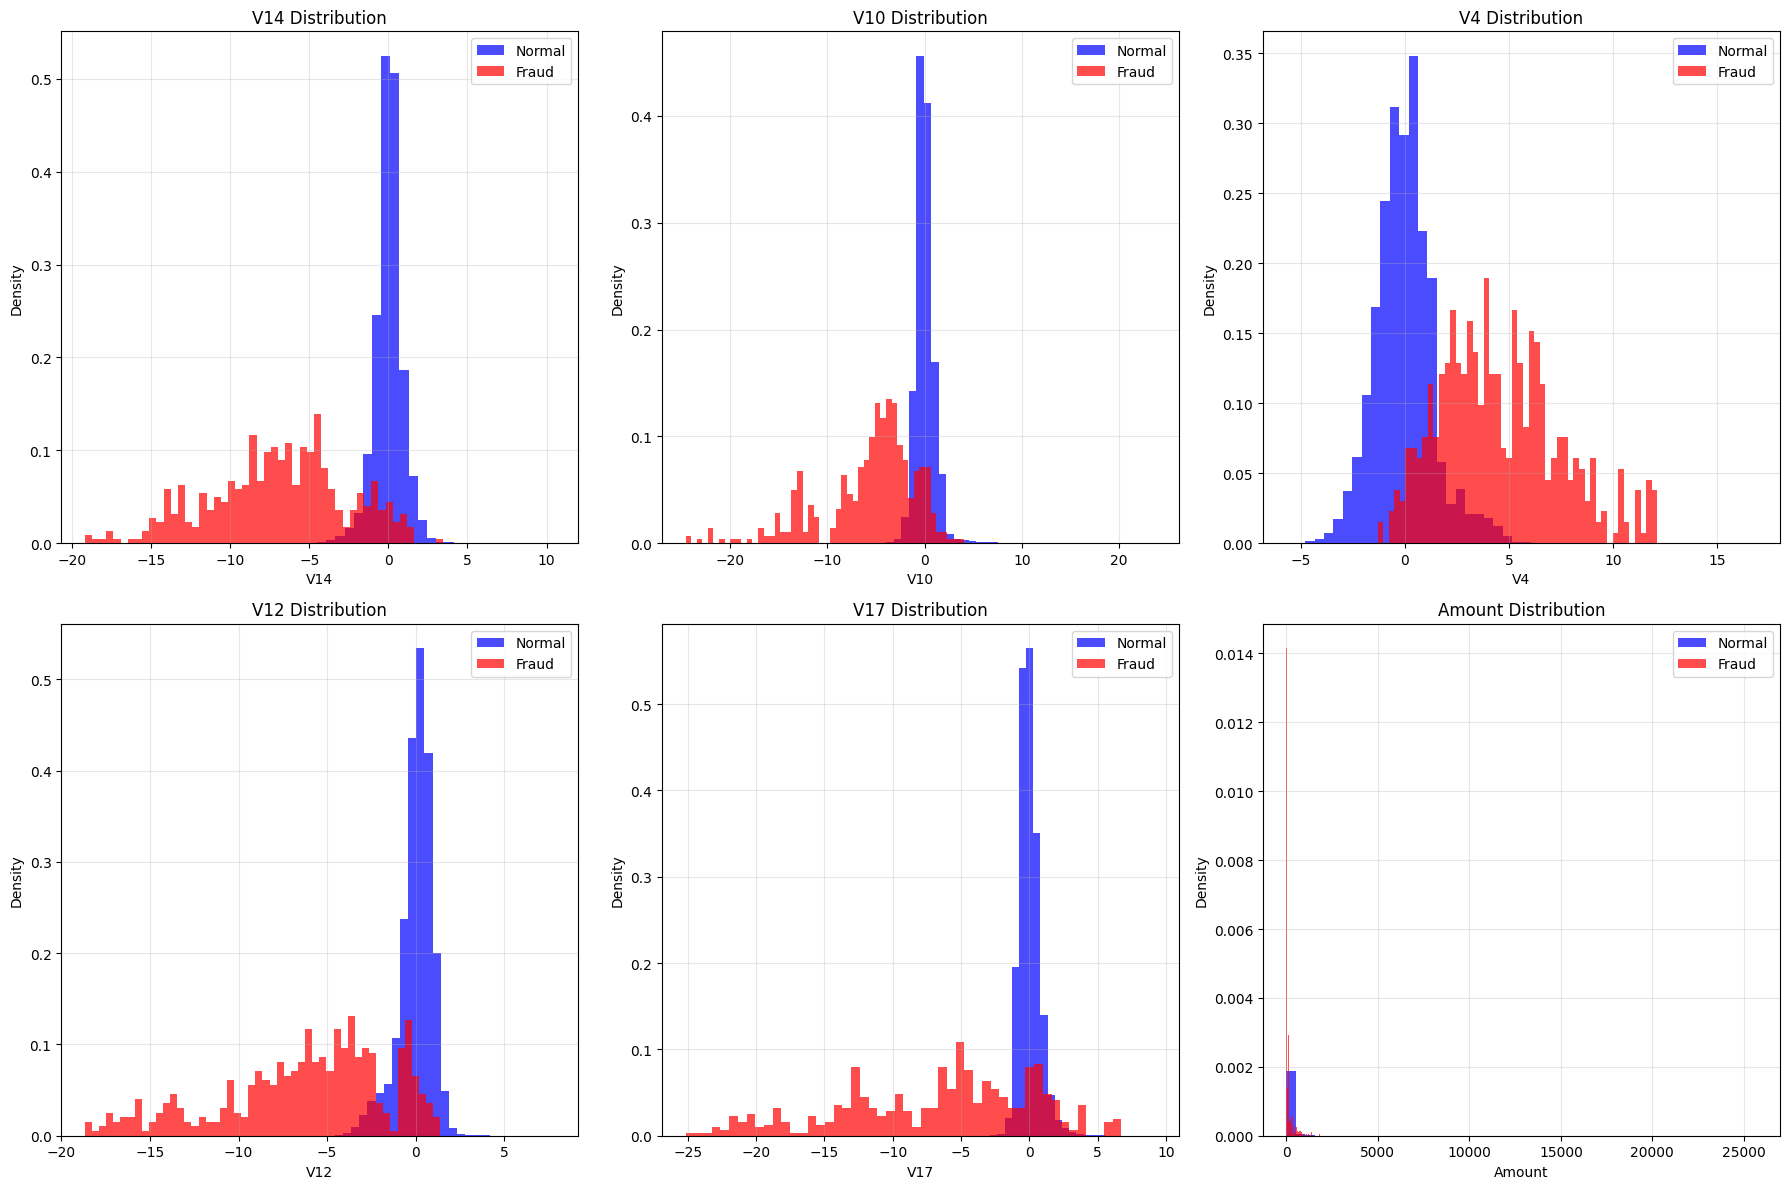


=== OUTLIER ANALYSIS ===


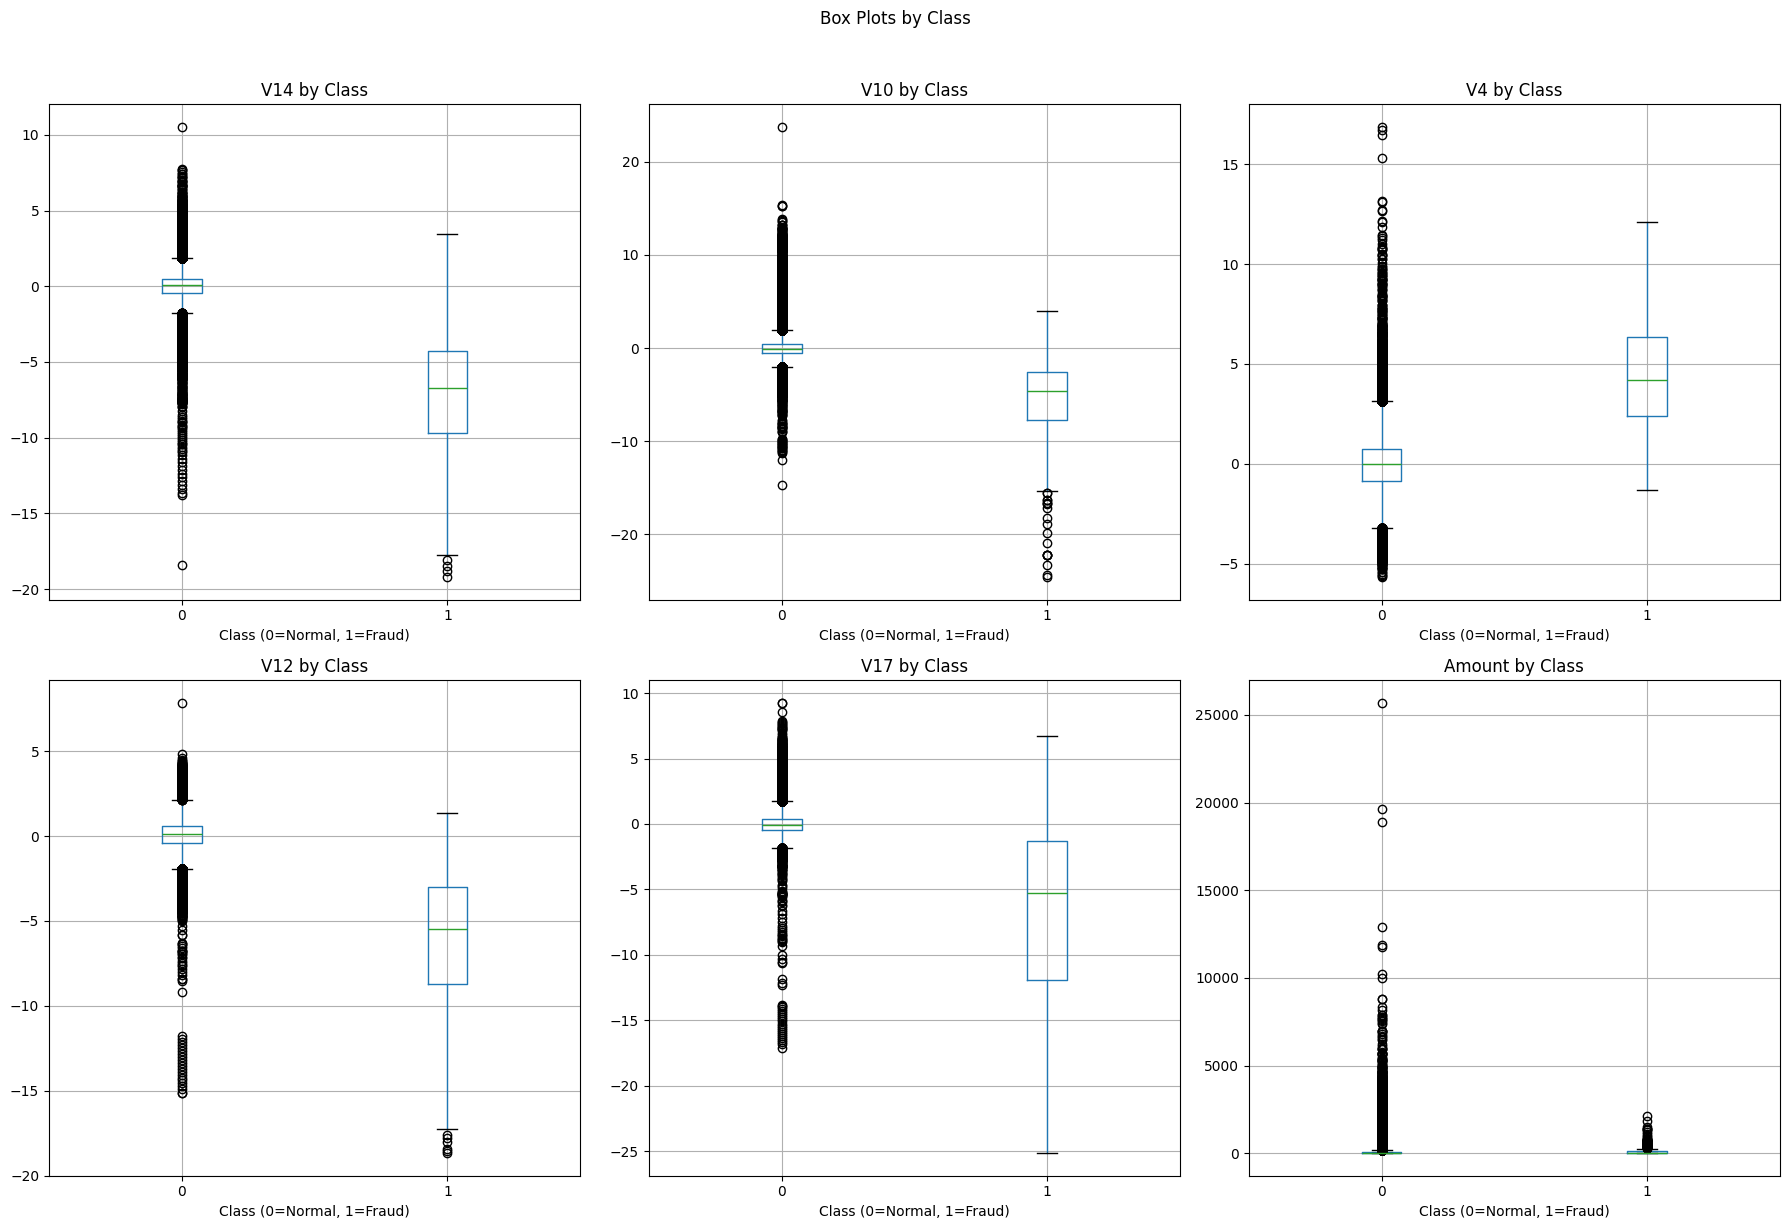

In [21]:
# Feature Distribution Analysis
print("=== FEATURE DISTRIBUTION ANALYSIS ===")

# Plot distributions of top important features
top_features = ['V14', 'V10', 'V4', 'V12', 'V17', 'Amount']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    # Fraud vs Normal distributions
    axes[i].hist(df[df['Class'] == 0][feature], bins=50, alpha=0.7, label='Normal', color='blue', density=True)
    axes[i].hist(df[df['Class'] == 1][feature], bins=50, alpha=0.7, label='Fraud', color='red', density=True)
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Box plots for outlier detection
print("\n=== OUTLIER ANALYSIS ===")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    df.boxplot(column=feature, by='Class', ax=axes[i])
    axes[i].set_title(f'{feature} by Class')
    axes[i].set_xlabel('Class (0=Normal, 1=Fraud)')

plt.suptitle('Box Plots by Class', y=1.02)
plt.tight_layout()
plt.show()

=== TIME-BASED FRAUD PATTERNS ===


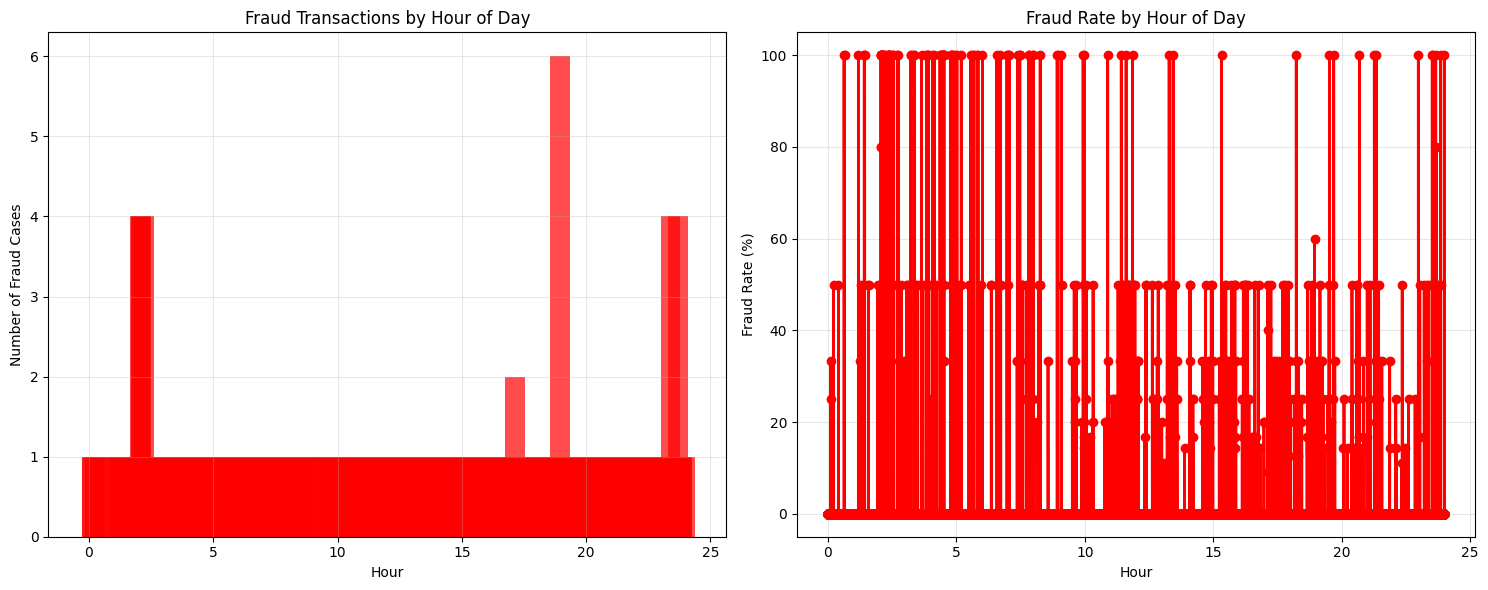

Peak fraud hour: 19:00
Highest fraud rate hour: 1:00
Lowest fraud rate hour: 0:00

=== TRANSACTION AMOUNT ANALYSIS ===


C:\Users\JAI GUPTA\AppData\Local\Temp\ipykernel_2340\902749237.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class'] == 0]['Amount'], df[df['Class'] == 1]['Amount']],


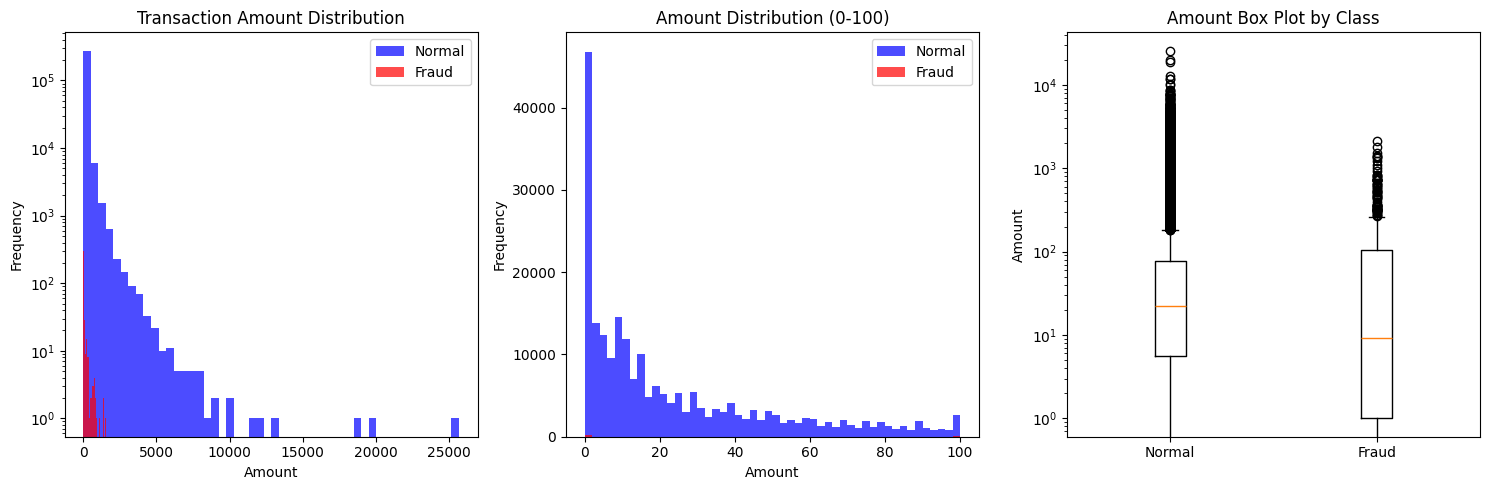


Amount Statistics:
Normal transactions - Mean: $88.29, Median: $22.00
Fraud transactions - Mean: $122.21, Median: $9.25

Fraud rate in top 5% highest amounts: 0.3021%


In [22]:
# Time-based Analysis
print("=== TIME-BASED FRAUD PATTERNS ===")

# Convert time to hours
df['Hour'] = (df['Time'] / 3600) % 24

# Fraud distribution by hour
fraud_by_hour = df.groupby('Hour')['Class'].agg(['count', 'sum', 'mean']).reset_index()
fraud_by_hour.columns = ['Hour', 'Total_Transactions', 'Fraud_Count', 'Fraud_Rate']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Fraud count by hour
ax1.bar(fraud_by_hour['Hour'], fraud_by_hour['Fraud_Count'], color='red', alpha=0.7)
ax1.set_title('Fraud Transactions by Hour of Day')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Fraud Cases')
ax1.grid(True, alpha=0.3)

# Fraud rate by hour
ax2.plot(fraud_by_hour['Hour'], fraud_by_hour['Fraud_Rate'] * 100, marker='o', color='red', linewidth=2)
ax2.set_title('Fraud Rate by Hour of Day')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Fraud Rate (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Peak fraud hour: {fraud_by_hour.loc[fraud_by_hour['Fraud_Count'].idxmax(), 'Hour']:.0f}:00")
print(f"Highest fraud rate hour: {fraud_by_hour.loc[fraud_by_hour['Fraud_Rate'].idxmax(), 'Hour']:.0f}:00")
print(f"Lowest fraud rate hour: {fraud_by_hour.loc[fraud_by_hour['Fraud_Rate'].idxmin(), 'Hour']:.0f}:00")

# Amount analysis
print(f"\n=== TRANSACTION AMOUNT ANALYSIS ===")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.yscale('log')

plt.subplot(1, 3, 2)
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Normal', color='blue', range=(0, 100))
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraud', color='red', range=(0, 100))
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution (0-100)')
plt.legend()

plt.subplot(1, 3, 3)
plt.boxplot([df[df['Class'] == 0]['Amount'], df[df['Class'] == 1]['Amount']], 
            labels=['Normal', 'Fraud'])
plt.ylabel('Amount')
plt.title('Amount Box Plot by Class')
plt.yscale('log')

plt.tight_layout()
plt.show()

# Amount statistics
print("\nAmount Statistics:")
print(f"Normal transactions - Mean: ${df[df['Class'] == 0]['Amount'].mean():.2f}, Median: ${df[df['Class'] == 0]['Amount'].median():.2f}")
print(f"Fraud transactions - Mean: ${df[df['Class'] == 1]['Amount'].mean():.2f}, Median: ${df[df['Class'] == 1]['Amount'].median():.2f}")

# High amount transactions
high_amount_threshold = df['Amount'].quantile(0.95)
high_amount_fraud_rate = df[df['Amount'] > high_amount_threshold]['Class'].mean()
print(f"\nFraud rate in top 5% highest amounts: {high_amount_fraud_rate*100:.4f}%")

=== MODEL COMPARISON ===

Training Random Forest...

Training Logistic Regression...

Training Gradient Boosting...

Training SVM (small sample)...

MODEL COMPARISON RESULTS:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
0        Random Forest    0.9992     1.0000  0.6364    0.7778   0.9073   
1  Logistic Regression    0.9803     0.0813  0.7727    0.1472   0.9150   
2    Gradient Boosting    0.9977     0.3333  0.0455    0.0800   0.2273   
3   SVM (small sample)    0.9787     0.0717  0.7273    0.1306   0.9083   

   Training Time  
0         1.0414  
1         1.6769  
2        42.6211  
3         2.1457  


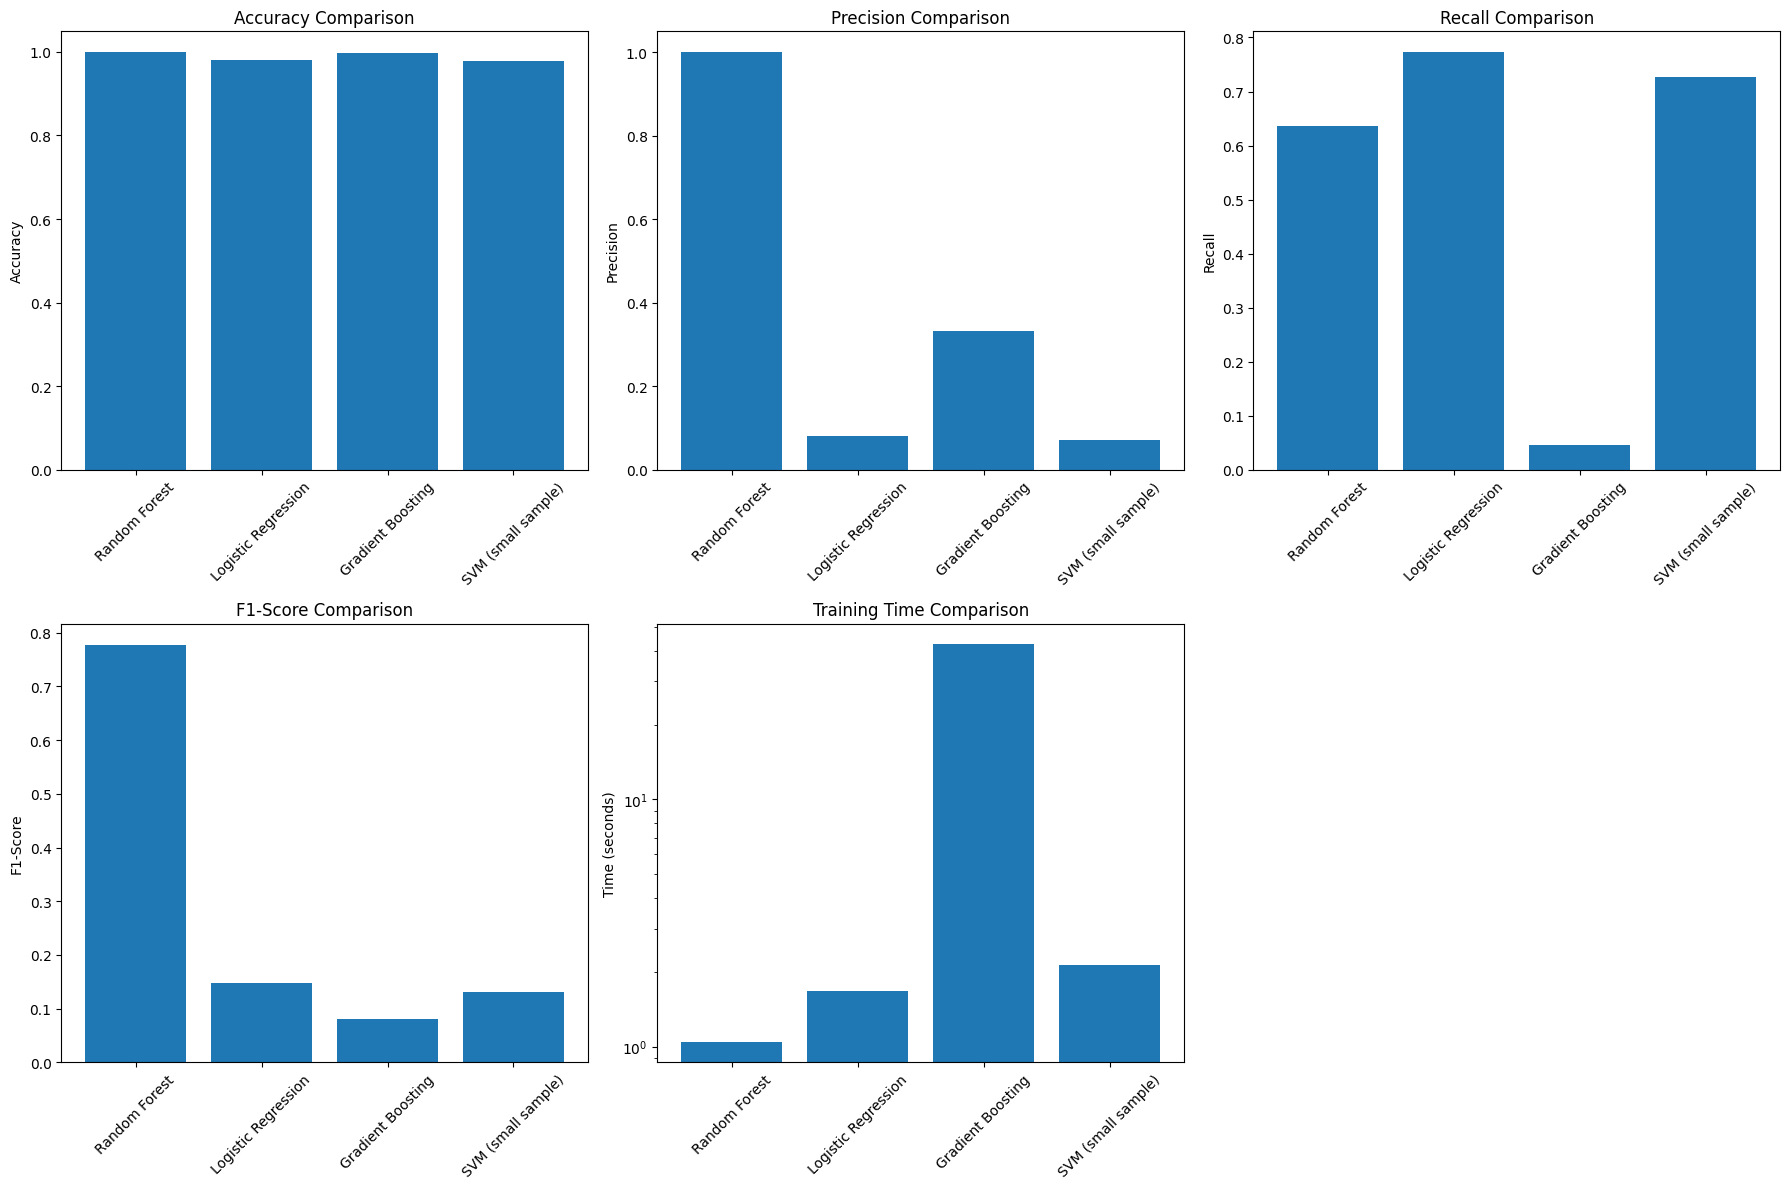

In [23]:
# Model Comparison Analysis
print("=== MODEL COMPARISON ===")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Use the same train/test split from our Random Forest model
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (small sample)': SVC(class_weight='balanced', probability=True, random_state=42)
}

results = []

for name, model_obj in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    
    # Use smaller sample for SVM due to computational complexity
    if name == 'SVM (small sample)':
        sample_indices = np.random.choice(len(X_train), min(5000, len(X_train)), replace=False)
        X_train_svm = X_train.iloc[sample_indices]
        y_train_svm = y_train.iloc[sample_indices]
        model_obj.fit(X_train_svm, y_train_svm)
    else:
        model_obj.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    # Predictions
    y_pred_model = model_obj.predict(X_test)
    y_prob_model = model_obj.predict_proba(X_test)[:, 1] if hasattr(model_obj, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_model)
    precision = precision_score(y_test, y_pred_model, zero_division=0)
    recall = recall_score(y_test, y_pred_model, zero_division=0)
    f1 = f1_score(y_test, y_pred_model, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob_model) if y_prob_model is not None else 'N/A'
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time': training_time
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL COMPARISON RESULTS:")
print("="*80)
print(comparison_df.round(4))

# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time']
for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    
    if metric == 'ROC-AUC':
        # Handle ROC-AUC separately due to potential 'N/A' values
        roc_data = comparison_df[comparison_df['ROC-AUC'] != 'N/A']
        axes[row, col].bar(roc_data['Model'], roc_data['ROC-AUC'].astype(float))
    else:
        axes[row, col].bar(comparison_df['Model'], comparison_df[metric])
    
    axes[row, col].set_title(f'{metric} Comparison')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)
    
    if metric == 'Training Time':
        axes[row, col].set_ylabel('Time (seconds)')
        axes[row, col].set_yscale('log')

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

In [24]:
# Business Impact Analysis
print("=== BUSINESS IMPACT ANALYSIS ===")

# Calculate financial impact
total_fraud_amount = fraud_data['Amount'].sum()
avg_fraud_amount = fraud_data['Amount'].mean()
total_transactions = len(df)
fraud_transactions = len(fraud_data)

print(f"Financial Impact Summary:")
print(f"  Total fraud amount: ${total_fraud_amount:,.2f}")
print(f"  Average fraud amount: ${avg_fraud_amount:.2f}")
print(f"  Total number of transactions: {total_transactions:,}")
print(f"  Number of fraud transactions: {fraud_transactions:,}")
print(f"  Fraud rate: {fraud_transactions/total_transactions*100:.4f}%")

# Model performance in business terms
from sklearn.metrics import confusion_matrix

# Using our best model (Random Forest)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\nModel Performance (Test Set):")
print(f"  True Negatives (Correctly identified normal): {tn}")
print(f"  False Positives (Normal flagged as fraud): {fp}")
print(f"  False Negatives (Missed fraud): {fn}")
print(f"  True Positives (Correctly identified fraud): {tp}")

# Calculate business metrics
if tp + fn > 0:  # Avoid division by zero
    fraud_detection_rate = tp / (tp + fn)
    fraud_missed_rate = fn / (tp + fn)
else:
    fraud_detection_rate = 0
    fraud_missed_rate = 0

false_alarm_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

print(f"\nBusiness Metrics:")
print(f"  Fraud Detection Rate: {fraud_detection_rate*100:.2f}%")
print(f"  Fraud Missed Rate: {fraud_missed_rate*100:.2f}%")
print(f"  False Alarm Rate: {false_alarm_rate*100:.2f}%")

# Estimate potential savings (assuming we catch fraud before processing)
test_fraud_indices = y_test[y_test == 1].index
if len(test_fraud_indices) > 0:
    test_fraud_amounts = X_test.loc[test_fraud_indices, 'Amount'] if 'Amount' in X_test.columns else [avg_fraud_amount] * len(test_fraud_indices)
    if hasattr(test_fraud_amounts, 'values'):
        detected_fraud_amount = test_fraud_amounts.iloc[:tp].sum() if tp > 0 else 0
        missed_fraud_amount = test_fraud_amounts.iloc[tp:].sum() if fn > 0 else 0
    else:
        detected_fraud_amount = sum(test_fraud_amounts[:tp]) if tp > 0 else 0
        missed_fraud_amount = sum(test_fraud_amounts[tp:]) if fn > 0 else 0
    
    print(f"\nEstimated Financial Impact on Test Set:")
    print(f"  Detected fraud amount: ${detected_fraud_amount:.2f}")
    print(f"  Missed fraud amount: ${missed_fraud_amount:.2f}")
    print(f"  Prevention rate: {detected_fraud_amount/(detected_fraud_amount + missed_fraud_amount)*100:.2f}%" if (detected_fraud_amount + missed_fraud_amount) > 0 else "N/A")

# Recommendations
print(f"\n=== RECOMMENDATIONS ===")
print(f"1. Model Performance:")
print(f"   - Current model achieves {accuracy*100:.2f}% accuracy")
print(f"   - Detects {fraud_detection_rate*100:.2f}% of fraud cases")
print(f"   - False alarm rate of {false_alarm_rate*100:.2f}%")

print(f"\n2. Key Risk Factors (Top Features):")
for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f}")

print(f"\n3. Time-based Patterns:")
peak_hour = fraud_by_hour.loc[fraud_by_hour['Fraud_Count'].idxmax(), 'Hour']
print(f"   - Monitor transactions more closely around {peak_hour:.0f}:00")
print(f"   - Implement dynamic risk scoring based on transaction time")

print(f"\n4. Implementation Strategy:")
print(f"   - Deploy model for real-time scoring")
print(f"   - Set threshold to balance detection vs false alarms")
print(f"   - Regular model retraining with new data")
print(f"   - Monitor for concept drift and data quality")

print(f"\n5. Business Value:")
print(f"   - Potential to prevent significant financial losses")
print(f"   - Improved customer experience through reduced false alarms")
print(f"   - Automated fraud detection reduces manual review costs")

=== BUSINESS IMPACT ANALYSIS ===
Financial Impact Summary:
  Total fraud amount: $60,127.97
  Average fraud amount: $122.21
  Total number of transactions: 284,807
  Number of fraud transactions: 492
  Fraud rate: 0.1727%

Model Performance (Test Set):
  True Negatives (Correctly identified normal): 9978
  False Positives (Normal flagged as fraud): 0
  False Negatives (Missed fraud): 8
  True Positives (Correctly identified fraud): 14

Business Metrics:
  Fraud Detection Rate: 63.64%
  Fraud Missed Rate: 36.36%
  False Alarm Rate: 0.00%

Estimated Financial Impact on Test Set:
  Detected fraud amount: $1785.31
  Missed fraud amount: $1367.41
  Prevention rate: 56.63%

=== RECOMMENDATIONS ===
1. Model Performance:
   - Current model achieves 97.87% accuracy
   - Detects 63.64% of fraud cases
   - False alarm rate of 0.00%

2. Key Risk Factors (Top Features):
   - V14: 0.157
   - V10: 0.144
   - V4: 0.122
   - V3: 0.099
   - V11: 0.094

3. Time-based Patterns:
   - Monitor transactions m